# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Два и более высших образования', 'Среднее', 'Ученая степень', 'Высшее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Не состоял в браке', 'Вдовец/Вдова', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Образование', 'Транспорт', 'Маркетинг', 'Информационные технологии', 'СМИ/Реклама/PR-агенства', 'Наука', 'Банк/Финансы', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Туризм', 'Торговля', 'Юридические услуги/нотариальные услуги', 'Нефтегазовая промышленность', 'Сборочные производства', 'Логистика', 'Ресторанный бизнес/Общественное питание', 'Строительство', 'Металлургия/Промышленность/Машиностроение', 'Подбор персонала', 'Страхование', 'Сельское хозяйство', 'Другие сферы', 'Недвижимость', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Здравоохранение', 'Развлечения/Искусство', 'Информационные услуги', 'Государственная служба'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
 

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
5           0.00
6           0.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13        806.93
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19          0.00
20          0.00
21          0.00
22          0.00
23          0.00
24          0.00
25          0.00
26          0.00
27          0.00
28          0.00
29          0.00
          ...   
30103       0.00
30104       0.00
30105       0.00
30106       0.00
30107       0.00
30108       0.00
30109       0.00
30110     605.59
30111       0.00
30112       0.00
30113       0.00
30114       0.00
30115       0.00
30116       0.00
30117       0.00
30118       0.00
30119       0.00
30120       0.00
30121       0.00
30122       0.00
30123       0.00
30124       0.00
30125       0.00
30126    3300.00
30127       0.00
30128       0.00
30129       0.00
30130       0.

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
Пропуски есть. Можно либо удалить данные троки, но лучше их дозаполнить
Например, есть пропуски в данных о текущем месте работы, должности и т.д, скорее всего это относится к пользователям, у которых соц статус - не работают. 
Такие строки можно дозаполнить данными - не работает
Также дозаполнить столбец PREVIOUS_CARD_NUM_UTILIZED нулями, так как и в описании написано, что если пусто, то 0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Категориальные признаки есть. по ним надо создать отдельные столбцы по каждому значению признака 

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [24]:
def preproc_data(df_input):
    df_output = df_input.copy()
        
    ## Your Code Here
    df_output = df_output.drop('AGREEMENT_RK', axis=1)
    df_output['PERSONAL_INCOME']=df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT']=df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT']=df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT']=df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT']=df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.GEN_INDUSTRY[df_output.GEN_INDUSTRY.isnull()] = 'None'
    df_output.GEN_TITLE[df_output.GEN_TITLE.isnull()] = 'None'
    df_output.ORG_TP_STATE[df_output.ORG_TP_STATE.isnull()] = 'None'
    df_output.ORG_TP_FCAPITAL[df_output.ORG_TP_FCAPITAL.isnull()] = 'None'
    df_output.JOB_DIR[df_output.JOB_DIR.isnull()] = 'None'
    df_output.TP_PROVINCE[df_output.TP_PROVINCE.isnull()] = 'NoData'
    df_output.WORK_TIME[df_output.WORK_TIME.isnull()] = 0
    df_output.PREVIOUS_CARD_NUM_UTILIZED[df_output.PREVIOUS_CARD_NUM_UTILIZED.isnull()] = 0
    df_output = pd.get_dummies(df_output, columns=[
        'EDUCATION',
        'MARITAL_STATUS',
        'GEN_INDUSTRY',
        'GEN_TITLE',
        'ORG_TP_STATE',
        'ORG_TP_FCAPITAL',
        'JOB_DIR',
        'FAMILY_INCOME',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'TP_PROVINCE',
        'REGION_NM'])
    
    return df_output

In [25]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\Users\itb_gev\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\itb_gev\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\itb_gev\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\itb_gev\Anaconda3\lib\site-packages\

In [32]:
df_train_preproc.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 449 columns):
TARGET                                                    15223 non-null int64
AGE                                                       15223 non-null int64
SOCSTATUS_WORK_FL                                         15223 non-null int64
SOCSTATUS_PENS_FL                                         15223 non-null int64
GENDER                                                    15223 non-null int64
CHILD_TOTAL                                               15223 non-null int64
DEPENDANTS                                                15223 non-null int64
PERSONAL_INCOME                                           15223 non-null float64
REG_FACT_FL                                               15223 non-null int64
FACT_POST_FL                                              15223 non-null int64
REG_POST_FL                                               15223 non-null int64
REG_FACT_POST_F

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [33]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [37]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\itb_gev\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [82]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(X_train1, y_train1)
predict_dtc = dtc.predict(X_test1)

rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)
predict_rfc = rfc.predict(X_test1)


model = LogisticRegression(class_weight='balanced')
model.fit(X_train1, y_train1)
predict_model=model.predict(X_test1)

print(predict_dtc)
print(predict_rfc)
print(predict_model)

[1 1 0 ... 1 0 0]
[0 0 0 ... 0 0 0]
[1 0 1 ... 0 1 0]


In [83]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

acc_dtc=accuracy_score(y_test1, predict_dtc)
precision_dtc=precision_score(y_test1, predict_dtc)
recall_dtc=recall_score(y_test1, predict_dtc)

acc_rfc=accuracy_score(y_test1, predict_rfc)
precision_rfc=precision_score(y_test1, predict_rfc)
recall_rfc=recall_score(y_test1, predict_rfc)


acc_model=accuracy_score(y_test1, predict_model)
precision_model=precision_score(y_test1, predict_model)
recall_model=recall_score(y_test1, predict_model)




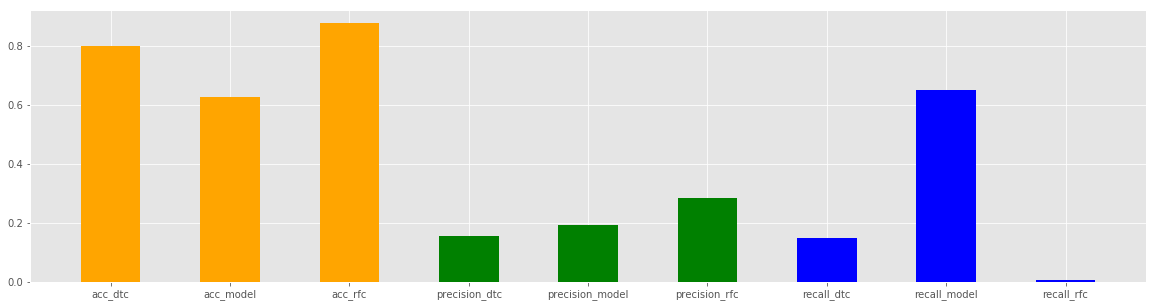

In [86]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt

xl=['acc_dtc','acc_rfc','acc_model','precision_dtc','precision_rfc','precision_model','recall_dtc','recall_rfc','recall_model']
yl=[acc_dtc,acc_rfc,acc_model,precision_dtc,precision_rfc,precision_model,recall_dtc,recall_rfc,recall_model]
clr=['orange','orange','orange','green','green','green','blue','blue','blue']


plt.figure(figsize=(20, 5))

plt.bar(xl,yl,width=0.5,color=clr)


plt.grid(True)

plt.show()

roc_auc rfc =  0.5023573423872526
roc_auc dtc =  0.5184152497462567
roc_auc model =  0.637011263506777


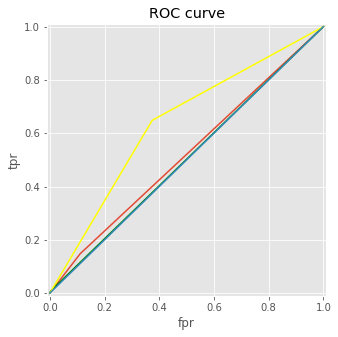

In [89]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test1, predict_dtc)
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc)

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test1, predict_rfc)
plt.plot(fpr_rfc, tpr_rfc,color='green')

fpr_model, tpr_model, thresholds_model = roc_curve(y_test1, predict_model)
plt.plot(fpr_model, tpr_model,color='yellow')

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('roc_auc rfc = ', roc_auc_score(y_test1, predict_rfc))
print('roc_auc dtc = ', roc_auc_score(y_test1, predict_dtc))
print('roc_auc model = ', roc_auc_score(y_test1, predict_model))
      

In [90]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


## Your Code Here
#rfc = RandomForestClassifier()
cvs_rfc=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

#dtc = DecisionTreeClassifier()
cvs_dtc=cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

cvs_model=cross_val_score(
    model,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

print(cvs_rfc)
print(cvs_dtc)
print(cvs_model)

[0.57171312 0.55093583 0.59469514 0.55366862 0.59913234 0.61062084
 0.57121345 0.57154511 0.63059851 0.60937867]
[0.50599401 0.49542534 0.53218098 0.51448783 0.56577099 0.51747068
 0.51335278 0.52663964 0.5380787  0.55478924]
[0.65419826 0.67657808 0.69373478 0.65129511 0.69610788 0.68576267
 0.71615147 0.72048566 0.70599165 0.69420858]


In [91]:
print(cvs_rfc.mean())
print(cvs_dtc.mean())
print(cvs_model.mean())

0.5863501616954048
0.5264190184385595
0.6894514132852444


In [92]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

model.fit(X, y)

predict = model.predict_proba(X_test)

predict

C:\Users\itb_gev\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[0.60378078, 0.39621922],
       [0.89083917, 0.10916083],
       [0.47252383, 0.52747617],
       ...,
       [0.5172449 , 0.4827551 ],
       [0.71211397, 0.28788603],
       [0.37935484, 0.62064516]])

In [93]:
# Померить roc_auc на тесте
roc_auc_score(y_test, predict[:,1])


0.6972461354754668